# Module 3 Final Project

<strong>Name:</strong> Allie Kelly<br>
<strong>Pace:</strong> Part-time<br>
<strong>Project Review: </strong><br>
<strong>Instructor:</strong> Victor Geislinger<br>
<strong>Blog Post URL:</strong>

## Import Packages and Data

In [1]:
import sqlite3
import scipy
import scipy.stats as stats
import statsmodels as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import math
import numpy as np
import pandas as pd

In [2]:
#begin SQL cursor, import data
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

# Hypothesis 1

$H_{0}$ The average product order quantity is equal whether a discount is applied or not.<br>
   
$H_{1}$ The average product order quantity increases when a discount is applied as compared to the average quantity when a discount is not applied. <Br>
    
This is a one-tailed t-test.

In [5]:
#Transform SQL data into DataFrame for the relevant table
cur.execute("""Select * FROM OrderDetail;""")
order_df= pd.DataFrame(cur.fetchall())
order_df.columns = [x[0] for x in cur.description]
order_df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


## EDA for Hypothesis 1

In [6]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
Id           2155 non-null object
OrderId      2155 non-null int64
ProductId    2155 non-null int64
UnitPrice    2155 non-null float64
Quantity     2155 non-null int64
Discount     2155 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 101.1+ KB


In [7]:
order_df.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


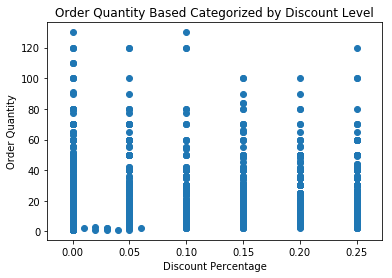

In [8]:
plt.scatter(order_df.Discount, order_df.Quantity)
plt.title("Order Quantity Based Categorized by Discount Level")
plt.xlabel("Discount Percentage")
plt.ylabel("Order Quantity");

/Users/Allie/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Order Quantity')

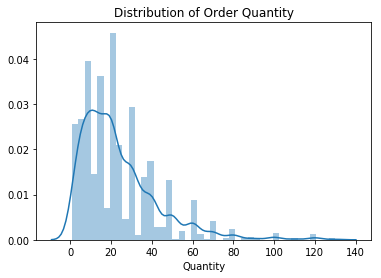

In [9]:
#Checking the distribution of order quantity
sns.distplot(order_df.Quantity)
plt.title("Distribution of Order Quantity")

The distribution of order quantity is relatively normal, though a bit skewed to the right. 

In [29]:
len(order_df.OrderId.unique()) #There are 830 different orders made, multiple products per order

830

In [30]:
order_discount_pivot = pd.pivot_table(order_df, 
                                      index="Discount", 
                                      
                                      columns='ProductId', 
                                      values="Quantity",
                                      fill_value=0.0, 
                                      margins=True)

In [12]:
order_discount_pivot

ProductId,1,2,3,4,5,6,7,8,9,10,...,69,70,71,72,73,74,75,76,77,All
Discount,,,,,,,,,,,,,,,,,,,,,
0.0,17.772727,21.473684,28.800000,17.20,29.333333,26.750000,29.904762,30,4.5,19.454545,...,18.500000,19.043478,21.800000,19.677419,22.125000,22.600000,21.758621,22.730769,17.869565,21.715262
0.01,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
0.02,0.000000,0.000000,0.000000,0.00,0.000000,1.000000,0.000000,0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
0.03,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.666667
0.04,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
0.05,20.000000,16.666667,0.000000,50.00,0.000000,33.000000,13.000000,0,0.0,20.000000,...,31.666667,21.000000,30.000000,20.000000,24.000000,0.000000,70.000000,33.000000,38.200000,28.010811
0.06,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
0.1,10.000000,20.000000,20.000000,22.50,15.000000,0.000000,20.000000,2,20.0,19.000000,...,21.333333,26.750000,24.500000,26.333333,20.000000,0.000000,20.600000,30.000000,24.000000,25.236994
0.15,19.600000,25.000000,0.000000,50.00,0.000000,0.000000,26.500000,15,16.0,49.333333,...,20.000000,29.000000,20.000000,27.500000,25.000000,20.000000,13.000000,27.000000,15.000000,28.382166


This pivot table shows the average order quantity of each product based on discount. From afar, it does look more or less like the quantity increases based on discount level. First however, we'll test whether having a discount affects quantity in general. 

In [13]:
# Splitting DataFrame based on whether or not the order had a discount 
no_discount = order_df.query('Discount == 0.0')
yes_discount = order_df.query('Discount > 0.0')

In [14]:
print(f'Number of orders with a discount: {len(yes_discount)}')
print(f'Average order quantity on orders with discount applied: {round(yes_discount.Quantity.mean(),2)}')

print(f'Number of orders without a discount: {len(no_discount)}')
print(f'Average order quantity on orders without discount applied: {round(no_discount.Quantity.mean(),2)}')


Number of orders with a discount: 838
Average order quantity on orders with discount applied: 27.11
Number of orders without a discount: 1317
Average order quantity on orders without discount applied: 21.72


## One-tailed T-Test

In [15]:
alpha = .05
results = stats.ttest_ind(yes_discount.Quantity, no_discount.Quantity, equal_var=False)
one_tailed_p = results[1]

In [17]:
if one_tailed_p < alpha:
    print(f'With a p-value of {one_tailed_p}, we can safely reject the null hypothesis.')
else:
    print('We cannot reject the null hypothesis.')

With a p-value of 5.65641429030433e-10, we can safely reject the null hypothesis.


In [18]:
#Replace all discounts 6% or below with a 5% discount level because there are so few orders at those levels.
to_replace = [.01, .02, .03, .04, .06]
value = [.05, .05, .05, .05, .05]#if values to replace is a list, value MUST be the same length
order_df.Discount.replace(to_replace=to_replace, value=value, inplace=True)

## Calculate Effect Size of Discount with Cohen's D

In [19]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [20]:
experiment = yes_discount.query("Discount == 0.05").Quantity
control = no_discount.Quantity

In [21]:
Cohen_d(experiment, control)

0.3468767736284544

In [22]:
experiment = yes_discount.query("Discount == 0.1").Quantity
control = no_discount.Quantity
Cohen_d(experiment, control)

0.19594203057834086

In [23]:
experiment = yes_discount.query("Discount == 0.15").Quantity
control = no_discount.Quantity
Cohen_d(experiment, control)

0.3724041317472808

In [24]:
experiment = yes_discount.query("Discount == 0.2").Quantity
control = no_discount.Quantity
Cohen_d(experiment, control)

0.3007122542913553

In [25]:
experiment = yes_discount.query("Discount == 0.25").Quantity
control = no_discount.Quantity
Cohen_d(experiment, control)

0.36659255652674416

The discount with the highest effect size is 15%, followed closely by a 25% discount. 

# Hypothesis 2

$H_{0}$ The price of the product has no effect on order quantity. <br> 
$H_{1}$ Price affects order quantity. 
<br><br>
This is a two-tailed t-test.

In [32]:
cur.execute("""Select * FROM Product;""")
product_df= pd.DataFrame(cur.fetchall())
product_df.columns = [x[0] for x in cur.description]
product_df.head()

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [33]:
product_df.ProductName.unique()

array(['Chai', 'Chang', 'Aniseed Syrup', "Chef Anton's Cajun Seasoning",
       "Chef Anton's Gumbo Mix", "Grandma's Boysenberry Spread",
       "Uncle Bob's Organic Dried Pears", 'Northwoods Cranberry Sauce',
       'Mishi Kobe Niku', 'Ikura', 'Queso Cabrales',
       'Queso Manchego La Pastora', 'Konbu', 'Tofu', 'Genen Shouyu',
       'Pavlova', 'Alice Mutton', 'Carnarvon Tigers',
       'Teatime Chocolate Biscuits', "Sir Rodney's Marmalade",
       "Sir Rodney's Scones", "Gustaf's Knäckebröd", 'Tunnbröd',
       'Guaraná Fantástica', 'NuNuCa Nuß-Nougat-Creme',
       'Gumbär Gummibärchen', 'Schoggi Schokolade', 'Rössle Sauerkraut',
       'Thüringer Rostbratwurst', 'Nord-Ost Matjeshering',
       'Gorgonzola Telino', 'Mascarpone Fabioli', 'Geitost',
       'Sasquatch Ale', 'Steeleye Stout', 'Inlagd Sill', 'Gravad lax',
       'Côte de Blaye', 'Chartreuse verte', 'Boston Crab Meat',
       "Jack's New England Clam Chowder", 'Singaporean Hokkien Fried Mee',
       'Ipoh Coffee', 'Gula

# Hypothesis 3

$H_{0}$ Products ordered do not change based on region that does the ordering. <br> 
$H_{1}$ Region has an effect on which products are ordered.  

This is a two-tailed t-test.